Este projeto se trata de uma análise exploratória mais superficial da base de dados de anúncios do Airbnb da cidade de Amsterdam, na Holanda. Os dados podem ser obtidos em: https://insideairbnb.com/get-the-data/

Serão feitas algumas análises mais introdutórias para ilustrar técnicas de descrição, manipulação e visualização dos dados. Também por isso foi utilizado o arquivo simplificado, com menos variáveis ("listings.csv"). Há no portal um dataset mais completo, com 106 campos, chamado "listings.csv.gz" que é recomendado para análises mais aprofundadas.

Na parte final, exploraremos o mapa da cidade disponibilizado num arquivo geojson no mesmo site.

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importando arquivo e analisando primeiras linhas

listings_amsterdam = pd.read_csv('listings_amsterdam.csv')
listings_amsterdam.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,306852,"SunShine, A Sunny Amsterdam Center Special",1141485,Gisèle And Simon,NaN,Centrum-Oost,52.35931,4.89844,Entire home/apt,200.0,4,32,2023-04-01,0.22,3,0,0,0363 33C3 B936 3911 FC42
1,307497,Historical sailing ship Amsterdam,1582128,Jorn,NaN,Westerpark,52.39185,4.88690,Entire home/apt,NaN,2,103,2024-05-12,0.72,2,274,4,Exempt
2,307621,"SunBird, Sunny Apt in Quiet Street",1141485,Gisèle And Simon,NaN,Centrum-Oost,52.35871,4.89616,Entire home/apt,155.0,3,6,2023-03-27,0.04,3,0,0,0363 33C3 B936 3911 FC42
3,308028,"SunFlower, A Sunny B&B",1141485,Gisèle And Simon,NaN,Centrum-Oost,52.35972,4.89750,Private room,NaN,3,36,2023-02-28,0.29,3,0,0,0363 33C3 B936 3911 FC42
4,311124,*historic centre* *bright* *canal view* *jordaan*,1600010,Anke & Robert,NaN,Centrum-West,52.37104,4.87713,Entire home/apt,NaN,5,93,2024-05-27,0.63,1,326,5,0363 59D8 7D30 6CFA DC81


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - cidade
* `neighbourhood` - nome do bairro (específico)
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - número de reviews nos últimos 12 meses
* `licensee` - código da licença do airbnb

In [3]:
## Avaliando tipos de variável e ocorrência de nulos
listings_amsterdam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9310 entries, 0 to 9309
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              9310 non-null   int64  
 1   name                            9310 non-null   object 
 2   host_id                         9310 non-null   int64  
 3   host_name                       9310 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   9310 non-null   object 
 6   latitude                        9310 non-null   float64
 7   longitude                       9310 non-null   float64
 8   room_type                       9310 non-null   object 
 9   price                           5903 non-null   float64
 10  minimum_nights                  9310 non-null   int64  
 11  number_of_reviews               9310 non-null   int64  
 12  last_review                     83

Notam-se valores ausentes apenas nas seguintes colunas:

* price - preços não inputados (possível erro)
* last_review/reviews_per_month/number_of_reviews_ltm - anúncios sem nenhuma avaliação
* license - anúncios que ainda não possuem uma licença oficial do airbnb

A seguir podemos ver a porcentagem de valores não nulos em cada coluna

In [4]:
(listings_amsterdam.isnull().sum()/listings_amsterdam.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
price                             0.365951
reviews_per_month                 0.106552
last_review                       0.106552
license                           0.010419
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
name                              0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
host_name                         0.000000
host_id                           0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
id                                0.000000
dtype: float64

O único fator de possível tratamento na análise são preços nulos, que representam aproximadamente 10% da base. Antes desse tratamento vamos avaliar a distribuição das variáveis numéricas.

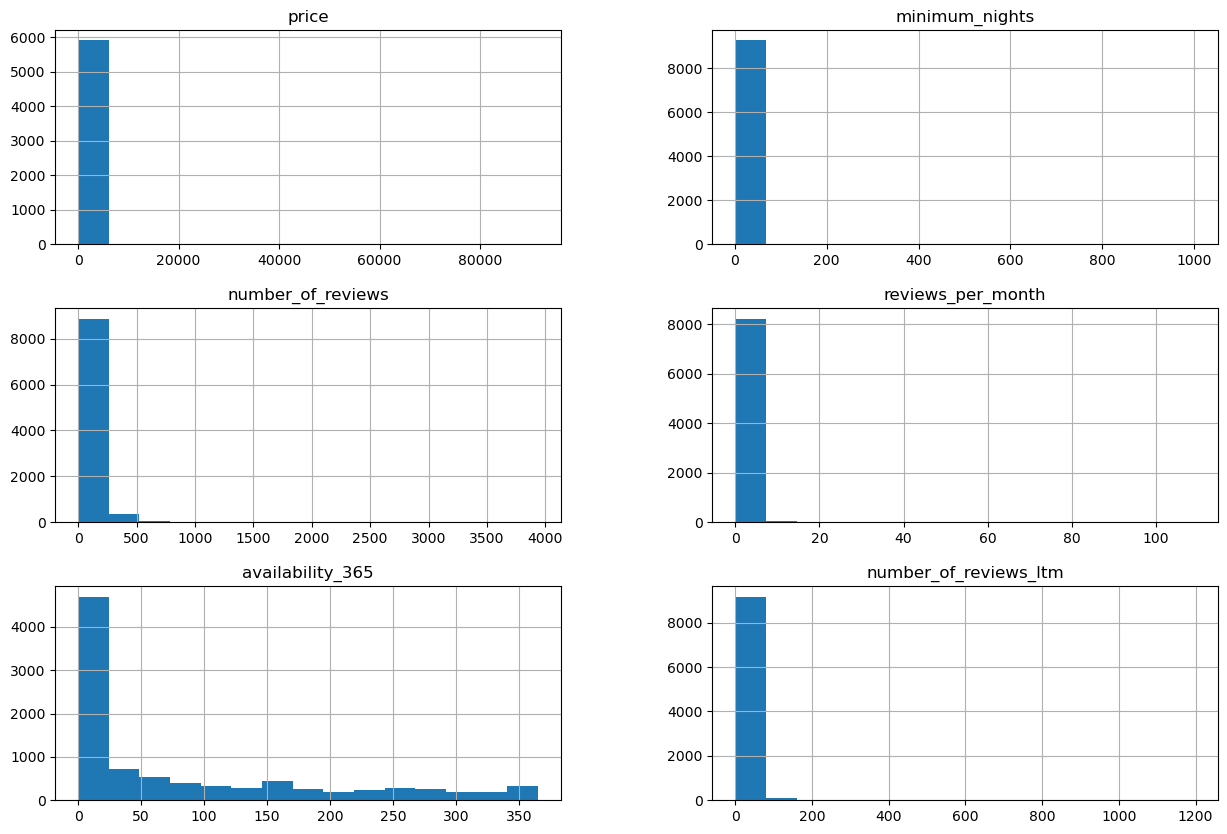

In [25]:
## Analisando distribuição das variáveis numéricas relevantes
listings_amsterdam[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'number_of_reviews_ltm']].hist(bins=15, figsize=(15,10))
plt.show()

Aparentemente há valores estranhos (outliers?) nas colunas price e minimum nights

In [6]:
## resumo estatístico das variáveis
listings_amsterdam.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,9.310000e+03,9.310000e+03,0.0,9310.000000,9310.000000,5903.000000,9310.000000,9310.000000,8318.000000,9310.000000,9310.000000,9310.000000
mean,4.147623e+17,1.174395e+08,NaN,52.366518,4.889940,291.624428,4.265521,45.691192,1.059463,1.779377,82.612030,9.772932
std,4.594349e+17,1.568381e+08,NaN,0.017430,0.035673,1211.726050,19.479233,116.773366,2.176872,2.707434,107.908334,26.917702
min,2.818000e+03,3.159000e+03,NaN,52.290340,4.755870,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.126231e+07,1.125933e+07,NaN,52.355485,4.864784,168.000000,2.000000,3.000000,0.230000,1.000000,0.000000,0.000000
50%,5.121999e+07,3.915161e+07,NaN,52.365560,4.887848,235.000000,3.000000,9.000000,0.470000,1.000000,23.000000,3.000000
75%,8.925584e+17,1.590708e+08,NaN,52.376390,4.909250,323.500000,4.000000,33.000000,1.000000,1.000000,148.000000,7.000000
max,1.175296e+18,5.818774e+08,NaN,52.425159,5.026669,91466.000000,1001.000000,3935.000000,109.200000,24.000000,365.000000,1198.000000


Apesar de 75% dos anúncios terem preços de até 323 euros por noite, há um anúncio cobrando 91 mil euros. Da mesma forma, há anúncio exigindo pelo menos 1001 noites de permanência, o que causa estranheza. 

Também há anúncio com 3935 reviews (quando 75% tem até 35 reviews). Isto porém pode ser apenas um anúncio realmente popular.

Olhando preço e noites mínimas, podemos levantar a hipótese de ser um mesmo anúncio com valores estranhos em ambas as colunas.

In [27]:
outliers = listings_amsterdam[(listings_amsterdam['price'] > 2000) | (listings_amsterdam['minimum_nights']>100)]
outliers.sort_values('price', ascending=False)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
7627,952864998978666703,Cozy apartment in De Pijp,44427343,Mathijs,NaN,De Pijp - Rivierenbuurt,52.356266,4.891267,Entire home/apt,91466.0,3,0,NaN,NaN,1,269,0,0363 EFA4 1545 099F 4F6B
9004,1137606306311941068,Amsterdam City Center Apartment,365788324,Yeh,NaN,Centrum-West,52.367550,4.890184,Entire home/apt,9371.0,3,0,NaN,NaN,1,89,0,0363 E44D 6A42 B497 8C95
7029,897037429506065313,Farada VIP: entire Crane,150677340,Faralda Crane Hotel,NaN,Oud-Noord,52.400967,4.894557,Entire home/apt,7051.0,1,0,NaN,NaN,4,328,0,0363 9333 882A 17A7 AB06
8353,1047634949162040987,NEW: Cosy | Hidden | Private Gem near Dam Square,46691672,Eva & Kobe,NaN,Centrum-West,52.375811,4.893900,Private room,5774.0,3,14,2024-05-26,3.31,14,121,14,0363CE6FDE07412043D8
7753,968203403339639631,Elegant & unique canal house in famous canal area,534378749,Todd,NaN,Centrum-West,52.368986,4.887528,Entire home/apt,2685.0,5,1,2023-09-20,0.11,1,333,1,0363 0CF8 8FC4 B932 DA4D
5182,612289973482163299,Enjoy ShipStays Hotel in Amsterdam!,18081564,Steven,NaN,Oud-Noord,52.399950,4.888400,Entire home/apt,2628.0,2,0,NaN,NaN,2,363,0,Exempt
5347,643315499225242586,Enjoy ShipStays Hotel in Amsterdam!,18081564,Steven,NaN,Oud-Noord,52.399930,4.891570,Entire home/apt,2598.0,1,0,NaN,NaN,2,358,0,Exempt
6533,826569398933826041,380 sqm Villa in Amsterdam with 12 bedrooms!,4456680,Neal Estate,NaN,De Aker - Nieuw Sloten,52.341016,4.818139,Entire home/apt,2250.0,5,0,NaN,NaN,18,167,0,Exempt
1417,12577304,Student Haven: Long-Term Retreat for Scholars,51485781,Vital,NaN,Gaasperdam - Driemond,52.308240,4.981370,Entire home/apt,202.0,180,9,2018-06-17,0.09,6,365,0,0363 3BDE 8A3C CB85 3689
1362,11966081,Comfortable & colorful with piano & garden in ...,63916400,Foke,NaN,Oud-Oost,52.350340,4.916020,Entire home/apt,195.0,365,48,2019-10-21,0.50,1,23,0,0363 88F0 20E0 7DC0 F37E


A suspeita inicial de que se tratavam de poucos ou até de 1 único anúncio não se confirmou.
Apesar disso, podemos ver que, basicamente, os outliers são explicados por:
- Temos 8 anúncios com preços acima dos 2 mil euros por noite. Alguns, pela descrição, são hospedagens em barcos. E temos também o anúncio de 91 mil euros.
* Quanto às noites, podemos inferir que se tratam de aluguéis por temporada, e não para estadias curtas de viagem. Quase todos eles estão, inclusive, sem a informação do preço

Como são pouquíssimos outliers, e praticamente todos têm características que os tornam muito diferentes dos demais anúncios, para os fins desta análise podemos descartá-los


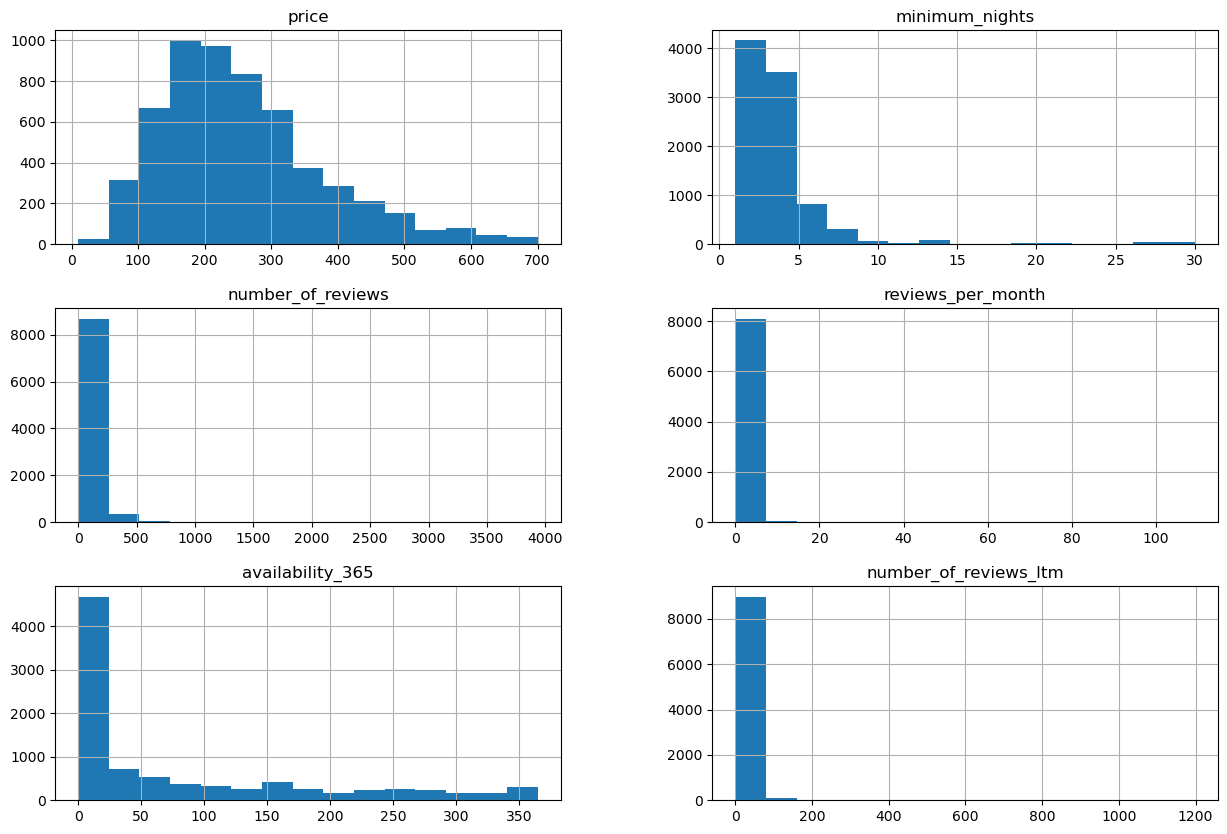

In [26]:
listings_amsterdam_clean = listings_amsterdam.copy()
listings_amsterdam_clean.drop(listings_amsterdam_clean[(listings_amsterdam_clean.price > 700) | (listings_amsterdam_clean.minimum_nights > 30)].index, axis = 0, inplace=True)
listings_amsterdam_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'number_of_reviews_ltm']].hist(bins=15, figsize=(15,10))
plt.show()

Vamos avaliar se há alguma correlação entre as variáveis relevantes.

In [11]:
corr = listings_amsterdam_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.007458,-0.247295,-0.207420,-0.064413,0.048566
minimum_nights,0.007458,1.000000,-0.111388,-0.141585,-0.060075,-0.043841
number_of_reviews,-0.247295,-0.111388,1.000000,0.778757,0.054682,0.187462
reviews_per_month,-0.207420,-0.141585,0.778757,1.000000,0.118588,0.237444
calculated_host_listings_count,-0.064413,-0.060075,0.054682,0.118588,1.000000,0.238962
availability_365,0.048566,-0.043841,0.187462,0.237444,0.238962,1.000000


Agora vamos colocar isso de forma visual em um mapa de calor

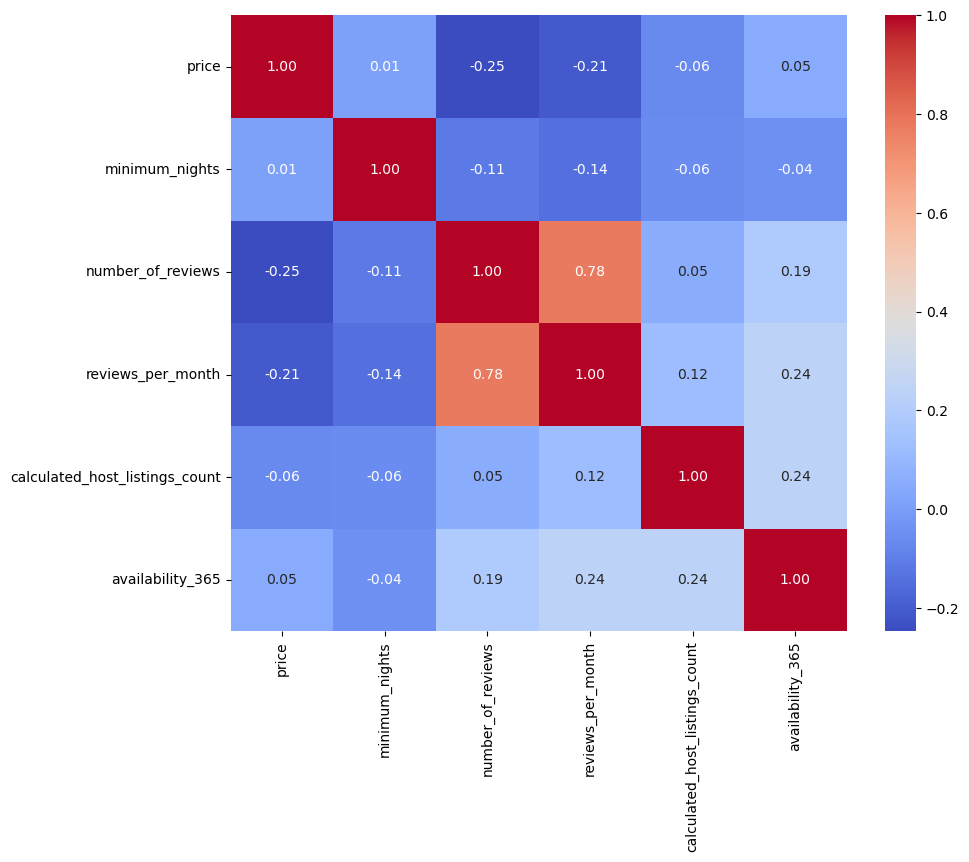

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap = 'coolwarm',fmt='.2f', square=True, linecolor='white', annot=True)
plt.show()

Dois pontos importantes nesse mapa de calor:
- Correlação é um número que vai de -1 a 1. Porém, no mapa acima, são considerados apenas os valores existentes, portanto a coloração pode confundir. Como o menor valor é -0.25, este recebe uma coloração mais intensa, podendo parecer que se trata de uma correlação mais forte do que é. É preciso fixar o valor mínimo em -1 e o máximo em 1
- Tanto correlações próximas a -1 quanto próximas a 1 são muito fortes, apenas em sentidos opostos. Precisamos evitar que o mapa dê a entender que uma das duas é fraca, o que pode ocorrer se adotarmos para valores negativos um tom "frio" e para positivos um tom "quente", ou vice-versa.

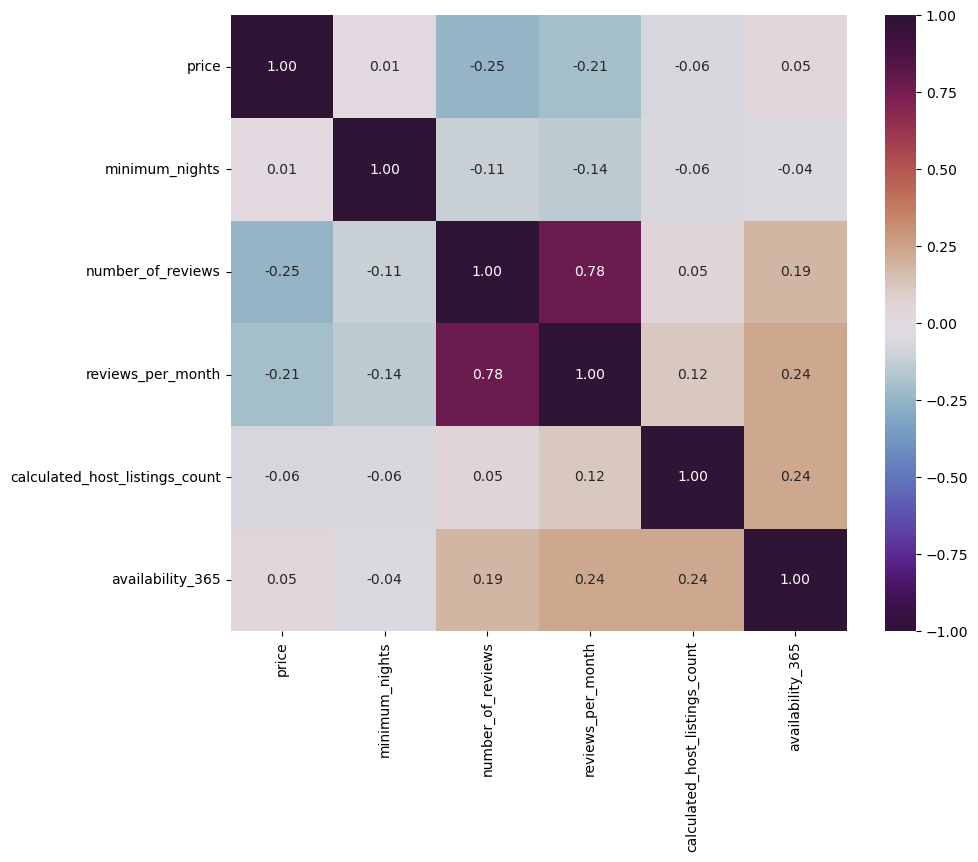

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='twilight_shifted', fmt='.2f', square=True, linecolor='white', annot=True, vmin = -1, vmax = 1)
plt.show()

- Chama a atenção a correlação entre preço e número de avaliações ser negativa e, mesmo não sendo tão forte (-0.25), ter certa relevância. Poderia se esperar que anúncios mais avaliados se tornassem mais populares e, portanto, mais caros. O que pode ocorrer é que avaliações negativas podem forçar os proprietários a abaixarem o preço. Para uma análise mais completa precisaríamos ter uma nota média das avaliações. 
- Claro que um número maior de reviews automaticamente gera mais reviews por mês, portanto essa correlação não tem maior significado. Da mesma forma, um anúncio ter maior disponibilidade ao longo do ano (availability_365) aumenta a chance de ser alugado mais vezes, o que portanto aumenta a quantidade de reviews. Por isso pode-se notar uma correlação da disponibilidade com as variáveis relacionadas a reviews.
- Porém, nota-se que hosts com mais anúncios não necessariamente cobram mais caro, assim como anúncios com mais reviews também não necessariamente são mais caros.
Do mesmo modo, uma estadia mínima maior não afeta o preço por noite, ao contrário do que poderia se imaginar.

Vamos avaliar agora os tipos de acomodação

In [14]:
listings_amsterdam_clean.groupby("room_type")["price"].agg(["count", "mean"])

,count,mean
room_type,,
Entire home/apt,4234,285.965517
Hotel room,29,196.724138
Private room,1446,166.669433
Shared room,21,199.952381


Como era de se esperar, as acomodações mais baratas são quartos compartilhados, seguidos por quartos privativos. Imóveis inteiros são mais caros, e há ainda quartos de hotéis anunciados no Airbnb, em média custando ainda mais caro do que uma hospedagem em um imóvel inteiro.

Vamos agora olhar para os bairros da cidade e buscar entender as características de cada um

In [17]:
pd.set_option('display.max_rows', 30)
neighborhood = listings_amsterdam_clean.groupby("neighbourhood")["price"].agg(["mean", "count"]).reset_index().sort_values("count", ascending=False)
neighborhood

,neighbourhood,mean,count
7,De Baarsjes - Oud-West,271.890456,922
8,De Pijp - Rivierenbuurt,283.209970,662
5,Centrum-West,261.615748,635
4,Centrum-Oost,281.282051,585
21,Zuid,286.352185,389
20,Westerpark,248.418733,363
17,Oud-Oost,245.760234,342
16,Oud-Noord,241.722628,274
2,Bos en Lommer,218.102767,253
14,Oostelijk Havengebied - Indische Buurt,240.585774,239


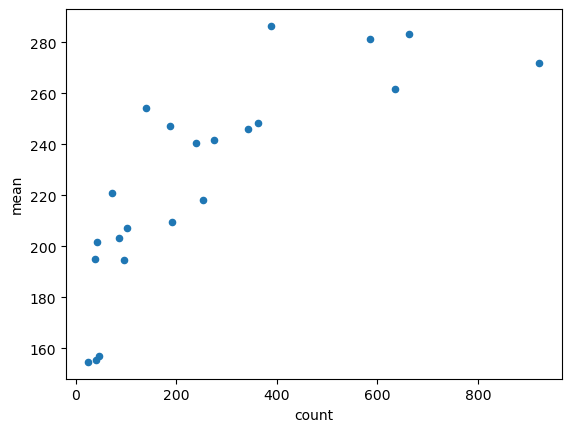

In [23]:
neighborhood.plot(kind="scatter", x='count', y='mean')
plt.show()

É possível notar um certo padrão, ou seja, quanto mais anúncios há em um bairro, mais caro é a média de preço por noite. São bairros turísticos e/ou centrais - conforme podemos ver [neste link](https://amsterdammap360.com/amsterdam-neighborhood-map) - onde há muito mais procura por acomodações. Apesar de haver alguns bairros com uma média de preços mais elevada mesmo tendo um volume menor de imóveis, o contrário não se verifica. Ou seja, não temos um bairro com grande oferta de imóveis a um preço médio menor.

Por fim, conforme dito na introdução, o mesmo site também disponibiliza um arquivo geojson com o mapa de Amsterdam, tendo inclusive as fronteiras dos bairros. Vamos utilizar este arquivo e bibliotecas do Python para ver melhor a distribuição dos anúncios pela cidade, já que o nosso dataset inicial contém colunas de latitude e longitude.

In [31]:
import geopandas as gpd
from shapely.geometry import Point


In [33]:
gdf = gpd.read_file('neighbourhoods.geojson')

In [34]:
# Converter latitude e longitude para pontos geográficosgeometry = [Point(xy) for xy in zip(listings_amsterdam_clean['longitude'], listings_amsterdam_clean['latitude'])]
geometry = [Point(xy) for xy in zip(listings_amsterdam_clean['longitude'], listings_amsterdam_clean['latitude'])]
gdf_points = gpd.GeoDataFrame(listings_amsterdam_clean, geometry=geometry)

In [35]:
# Definir o sistema de referência espacial (CRS) para os pontos
gdf_points.crs = {'init': 'epsg:4326'}

c:\Users\gmcos\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Após a preparação dos dados, vamos plotar os pontos no mapa. Primeiro, dividindo-os por bairro

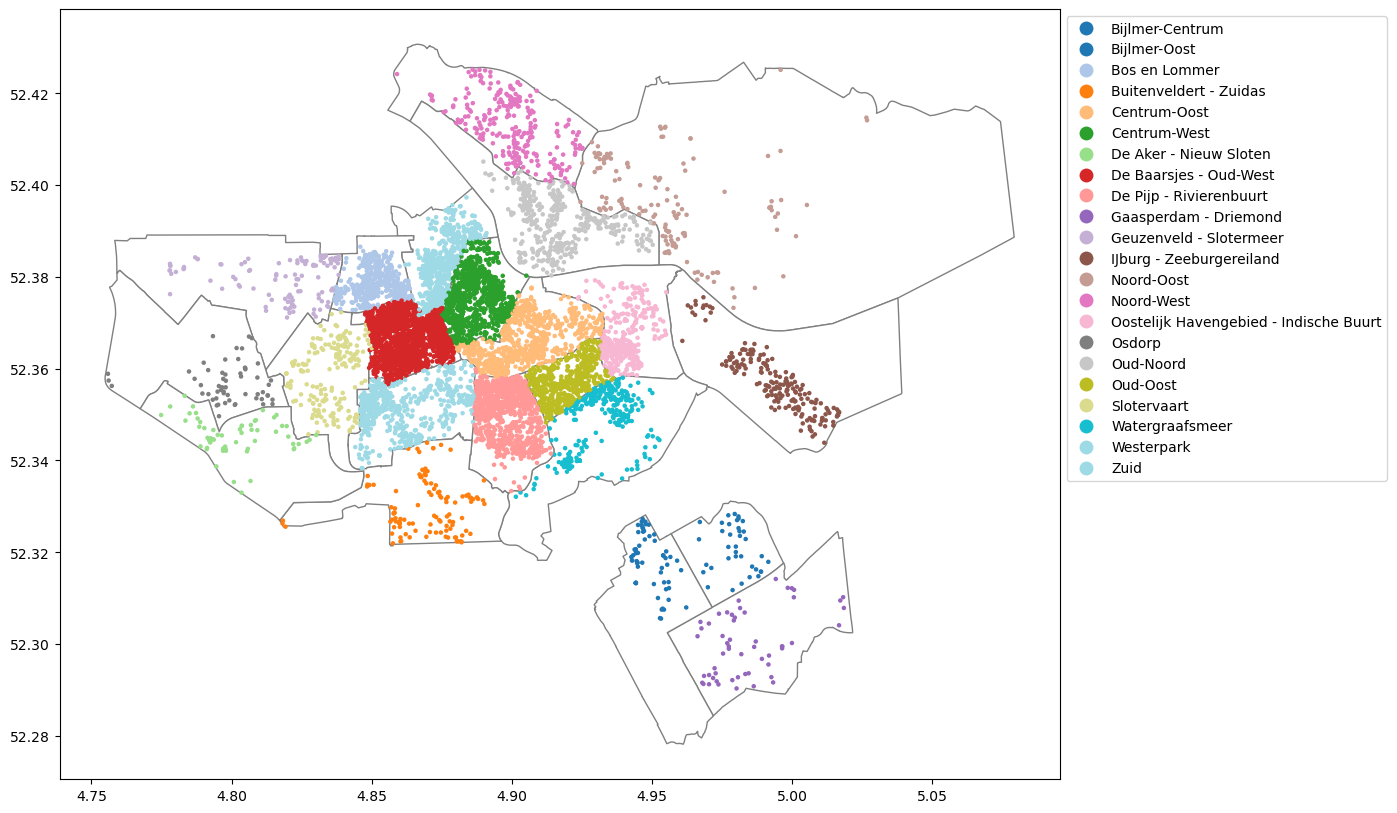

In [51]:
ax = gdf.plot(figsize=(30, 10), color='white', edgecolor='gray')
gdf_points.plot(ax=ax, column='neighbourhood', legend=True, cmap='tab20', markersize=5)
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))
plt.show()

Vamos agora ver como se comportam os preços em diferentes locais da cidade

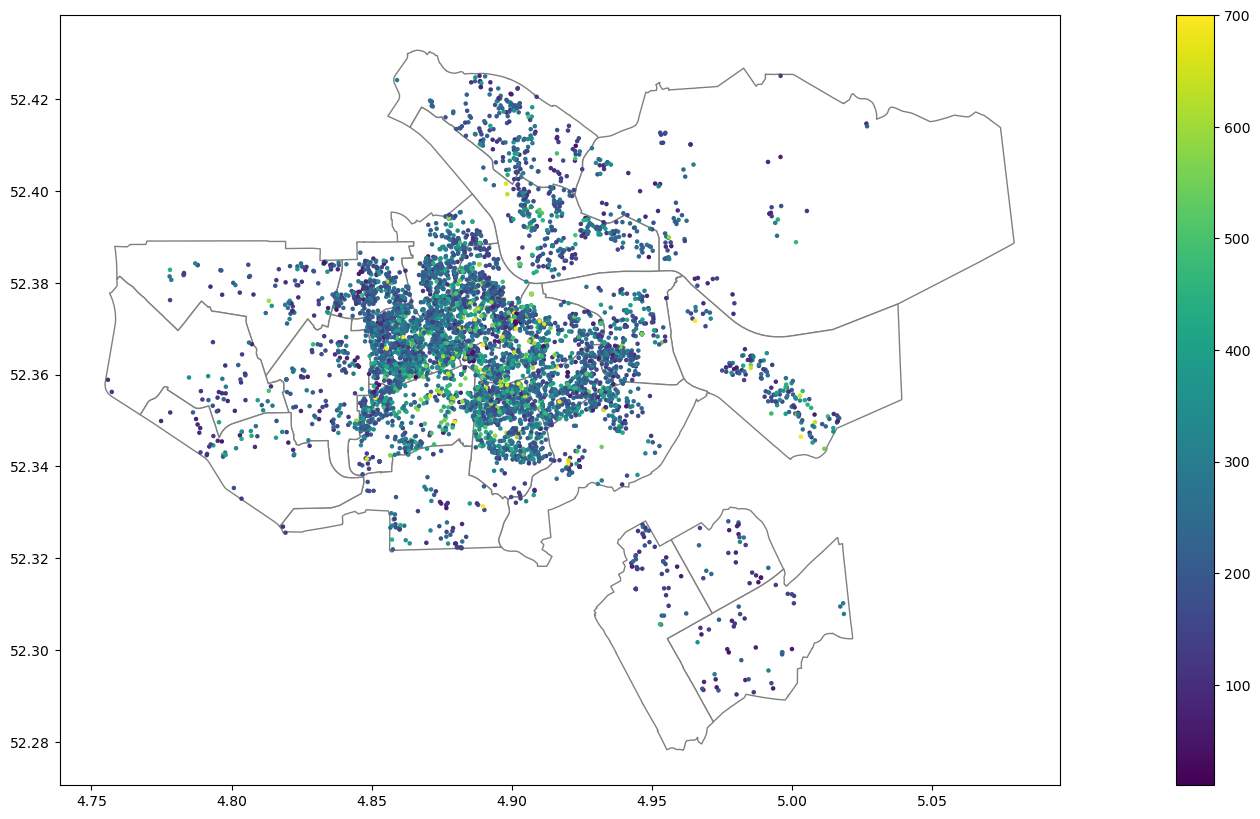

In [52]:
ax = gdf.plot(figsize=(30, 10), color='white', edgecolor='gray')
gdf_points.plot(ax=ax, column='price', legend=True, cmap='viridis', markersize=5)
plt.show()

A imagem corrobora a análise feita anteriormente, de que anúncios mais caros estavam concentrados em bairros centrais e com alta oferta de imóveis, ou seja, destinos populares de turismo. 
Também vemos alguns imóveis mais caros em áreas mais afastadas.